In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #
from scipy.stats import spearmanr
from scipy.stats import wilcoxon

# Pointing Task: Correlation between error and confidence 

In [19]:
errors = pd.read_csv('task_error_mean.csv', index_col=0) 
errors = errors.iloc[:, :-3]
errors_mean = errors.loc['mean']
errors = errors.iloc[:-1, :]
errors

,Target 1,Target 2,Target 3,Target 4,Target 5,Target 6,Target 7,Target 8
starting point,176.327482,34.962345,14.310965,102.971672,3.104019,29.839506,2.132032,26.106436
Loc 4,57.374405,43.848091,15.221251,NaN,11.046887,34.164634,2.314694,24.004383
Loc 6,78.118001,76.526460,19.546503,23.929666,64.886826,NaN,17.228787,108.222581
Loc 7,30.082320,2.129428,25.438803,17.010529,14.309440,21.387745,NaN,20.477035
Loc 5,51.011902,23.467791,2.676414,22.708108,NaN,48.142959,5.832637,1.816345
End start point,84.327482,40.962345,10.310965,20.028328,12.104019,34.839506,0.132032,0.893564


<Axes: xlabel='mean', ylabel='Count'>

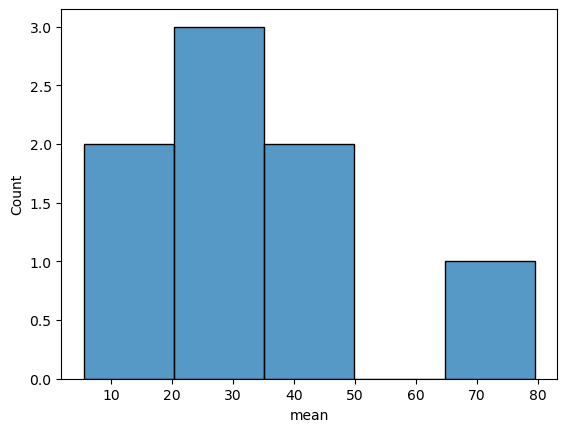

In [18]:
sns.histplot(errors_mean)

In [23]:
con_4 = np.mean([0,10,10,10,10])
con_6 = np.mean([4,4,7,7,7])
confidences = [0,1,10,con_4,9,con_6,7,2]

In [24]:
# Spearman correlation
rho, p = spearmanr(errors_mean, confidences)
print(f"Spearman rho = {rho:.3f}, p = {p:.3f}")

Spearman rho = -0.619, p = 0.102


# Head Tracking 

In [32]:
errors = pd.read_csv('error_with_correct_IMU_mad.csv', index_col=0) 
errors = errors.iloc[:-6, :]
ht_error = errors.diff_median_abs.tolist()
ht_error

[-5.124082896273137,
 8.918233148041438,
 -13.879337617947613,
 0.5291623396692415,
 4.84369217111788,
 2.5143858576558955,
 -10.68378835623389,
 0.5624582931188229,
 -9.618445367219351,
 -0.4416025349169672,
 -0.0511230858101043,
 nan,
 -2.860597189529244,
 -3.82095760670768,
 16.318279773594526,
 nan,
 8.743870996907845,
 nan,
 -7.881508769610093,
 4.606926126006499,
 16.678455441307904,
 nan,
 4.289107513856397,
 nan,
 4.827055116612087,
 nan]

In [35]:
np.nanmedian(ht_error)

0.5458103163940322

In [37]:
q25, q75 = np.nanpercentile(ht_error, [25, 75])
print(f"Fix IQR: {q75 - q25:.2f} ({q25:.2f}–{q75:.2f})")

Fix IQR: 8.98 (-4.15–4.83)


In [50]:
# Clean and match trial pairs
errors['base_id'] = errors['Id'].str.replace('_beg', '', regex=False).str.replace('_end', '', regex=False)
errors['phase'] = errors['Id'].str.extract(r'_(beg|end)$')
# Pivot the data to align beg and end in one row
pivoted = errors.pivot(index='base_id', columns='phase', values='diff_median_abs').reset_index()

# Drop any rows where either beg or end is missing
paired = pivoted.dropna(subset=['beg', 'end'])
display(paired)

# Run Wilcoxon signed-rank test
stat, p = wilcoxon(paired['beg'], paired['end'])
print(f"Wilcoxon signed-rank test: W = {stat:.3f}, p = {p:.3f}")


phase,base_id,beg,end
0,Expl_1_ET_1,-5.124083,8.918233
1,Expl_1_ET_2,-13.879338,0.529162
2,Expl_1_ET_3,4.843692,2.514386
3,Expl_2_ET_1,-10.683788,0.562458
4,Expl_2_ET_2,-9.618445,-0.441603
6,Expl_3_ET_1,-2.860597,-3.820958
9,Expl_4_ET_1,-7.881509,4.606926


Wilcoxon signed-rank test: W = 3.000, p = 0.078
